# Exploratory Data Analysis (Part 1)

The attached login.json file contains (simulated) timestamps of user logins in a particular geographic location.

Aggregate these logins counts based on 15-minute time intervals
Visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand
Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [72]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
# Load json file into pandas dataframe
df = pd.read_json('logins.json')
df.head() #further inspection showed the data is already sorted

login_time
0 1970-01-01 20:13:18
1 1970-01-01 20:16:10
2 1970-01-01 20:16:37
3 1970-01-01 20:16:36
4 1970-01-01 20:26:21

In [3]:
df.tail() #Last day April 13

login_time
93137 1970-04-13 18:50:19
93138 1970-04-13 18:43:56
93139 1970-04-13 18:54:02
93140 1970-04-13 18:57:38
93141 1970-04-13 18:54:23

In [4]:
df.describe() # view describtive statistics

login_time
count                 93142
unique                92265
top     1970-02-12 11:16:53
freq                      3
first   1970-01-01 20:12:16
last    1970-04-13 18:57:38

In [5]:
df.dtypes #data is already in date time format

login_time    datetime64[ns]
dtype: object

In [6]:
df.isnull().values.any() # no null values

False

In [7]:
df['weekday'] = df.login_time.dt.strftime('%a')
df['hour'] = df.login_time.dt.strftime('%H')
df['day'] = df.login_time.dt.strftime('%d')
df['month'] = df.login_time.dt.strftime('%b')
df['count'] = 1 # Add a numeric column (you need something for resampling to aggregate)

In [8]:
df.head()

login_time weekday hour day month  count
0 1970-01-01 20:13:18     Thu   20  01   Jan      1
1 1970-01-01 20:16:10     Thu   20  01   Jan      1
2 1970-01-01 20:16:37     Thu   20  01   Jan      1
3 1970-01-01 20:16:36     Thu   20  01   Jan      1
4 1970-01-01 20:26:21     Thu   20  01   Jan      1

In [9]:
df.set_index('login_time', inplace=True)

In [10]:
# Resample in 15minute time interval

df15 = df.resample('15T', how='sum')

C:\Users\Ameen\Miniconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df15.head(3)

count
login_time                
1970-01-01 20:00:00      2
1970-01-01 20:15:00      6
1970-01-01 20:30:00      9

In [12]:
df = df.reset_index()
df15 = df15.reset_index()

In [13]:
df.set_index('login_time', inplace=True)

In [14]:
count_hour = df.groupby('hour')['count'].sum()

count_hour = pd.DataFrame(count_hour).reset_index()

count_hour

hour  count
0    00   5993
1    01   6317
2    02   5800
3    03   4831
4    04   5034
5    05   2945
6    06   1138
7    07    815
8    08    818
9    09   1527
10   10   3064
11   11   5799
12   12   4964
13   13   3611
14   14   3426
15   15   3038
16   16   2832
17   17   2584
18   18   2980
19   19   3235
20   20   4103
21   21   5623
22   22   6607
23   23   6058

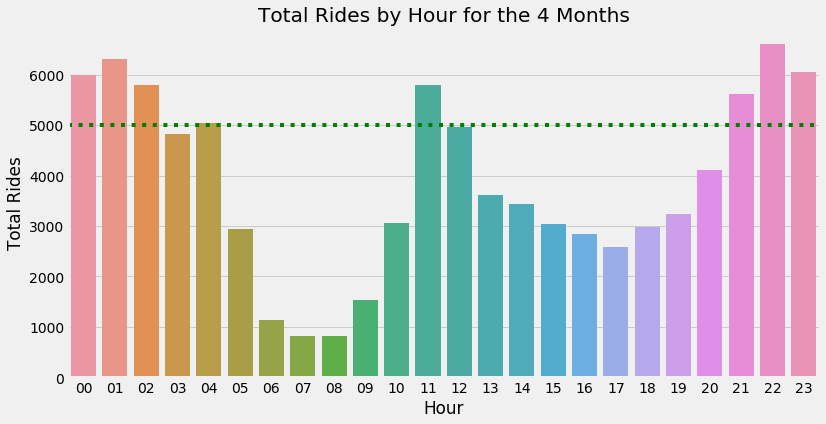

In [15]:
# Plot the mean CO2 levels for each month of the year
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 6))

ax = sns.barplot(x='hour', y='count', data=count_hour)
ax.axhline(5000, color='green', linestyle=':')
plt.xlabel('Hour')
plt.ylabel('Total Rides')
plt.title('Total Rides by Hour for the 4 Months')

plt.show()

**Peak Hours:**

- 12 am
- 1 am
- 2 am
- 11 am
- 9 pm
- 10 pm
- 11 pm

The distrubtion makes sense. Rides are probably being used for getting to work in the morning, or going out at night.

In [16]:
count_weekday = df.groupby('weekday')['count'].sum()

count_weekday = pd.DataFrame(count_weekday)

new_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

count_weekday = count_weekday.reindex(new_index)

count_weekday = count_weekday.reset_index()

In [17]:
count_weekday

weekday  count
0     Mon   8823
1     Tue   9268
2     Wed  10339
3     Thu  11960
4     Fri  15208
5     Sat  19377
6     Sun  18167

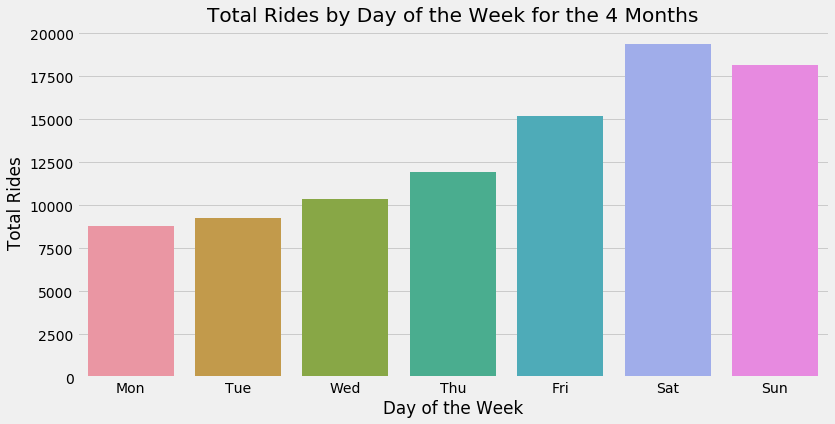

In [18]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(12, 6))

ax = sns.barplot(x='weekday', y='count', data=count_weekday)
plt.xlabel('Day of the Week')
plt.ylabel('Total Rides')
plt.title('Total Rides by Day of the Week for the 4 Months')

plt.show()

**Weekends are when most of the rides are happening**

In [ ]:
count_month = df.groupby('month')['count'].sum()

new_index = ['Jan', 'Feb', 'Mar', 'Apr']

count_month = count_month.reindex(new_index)

count_month = pd.DataFrame(count_month).reset_index()

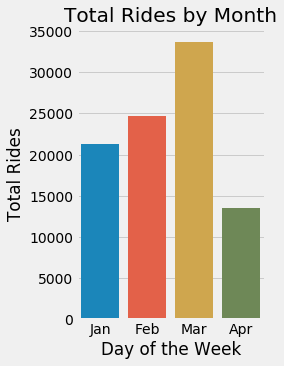

In [ ]:
plt.style.use('fivethirtyeight')


fig = plt.figure(figsize=(3, 5))

ax = sns.barplot(x='month', y='count', data=count_month)
plt.xlabel('Day of the Week')
plt.ylabel('Total Rides')
plt.title('Total Rides by Month')

plt.show()

<div class="mark">
March was the busiest month. It's hard to say about April because the data present isn't the full month</div><i class="fa fa-lightbulb-o "></i>

In [ ]:
df15['weekday'] = df15.login_time.dt.strftime('%a')
df15['hour'] = df15.login_time.dt.strftime('%H')
df15['day'] = df15.login_time.dt.strftime('%d')
df15['month'] = df15.login_time.dt.strftime('%b')

df15.head()

login_time  count weekday hour day month
0 1970-01-01 20:00:00      2     Thu   20  01   Jan
1 1970-01-01 20:15:00      6     Thu   20  01   Jan
2 1970-01-01 20:30:00      9     Thu   20  01   Jan
3 1970-01-01 20:45:00      7     Thu   20  01   Jan
4 1970-01-01 21:00:00      1     Thu   21  01   Jan

# January

In [ ]:
january = df15[(df15['login_time'] > '1970-01') & (df15['login_time'] < '1970-02')]
january.describe()

count
count  2896.000000
mean      7.333909
std       6.099863
min       0.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      45.000000

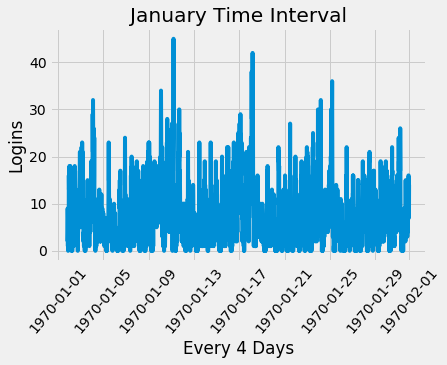

In [ ]:
# Plot January Logins
x = january['login_time']
y = january['count']
plt.plot(x, y)
plt.title('January Time Interval')
plt.xticks(rotation = 50)
plt.xlabel("Every 4 Days")
plt.ylabel("Logins")
plt.show()

# February

In [ ]:
february = df15[(df15['login_time'] > '1970-02') & (df15['login_time'] < '1970-03')]
february.describe()

count
count  2687.000000
mean      9.177894
std       7.797917
min       0.000000
25%       3.000000
50%       7.000000
75%      13.000000
max      50.000000

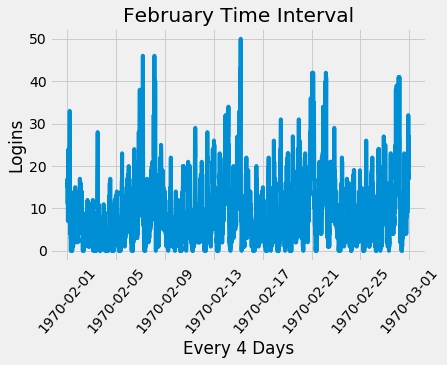

In [ ]:
# Plot February Logins
x = february['login_time']
y = february['count']
plt.plot(x, y)
plt.title('February Time Interval')
plt.xticks(rotation = 50)
plt.xlabel("Every 4 Days")
plt.ylabel("Logins")
plt.show()

# March

In [ ]:
march = df15[(df15['login_time'] > '1970-03') & (df15['login_time'] < '1970-04')]
march.describe()

count
count  2975.000000
mean     11.330084
std       9.336997
min       0.000000
25%       4.000000
50%       9.000000
75%      16.000000
max      73.000000

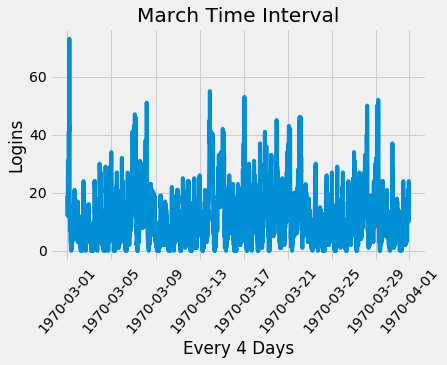

In [ ]:
# Plot February Logins
x = march['login_time']
y = march['count']
plt.plot(x, y)
plt.title('March Time Interval')
plt.xticks(rotation = 50)
plt.xlabel("Every 4 Days")
plt.ylabel("Logins")
plt.show()

# Part 2

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities by reimbursing all toll costs.

**Question 1:** What woud you choose as the key measure of success of this experiment in encouraging driver partners to server both cities, and why would you choose this metric?

**Question 2:** Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a. How you will implement the experiment <br>
b. What statistical test(s) you will conduct to verify the significance of the observation <br>
c. How would you interpret the results and provide recommendations to the city operations team along with any caveats

**Answer 1:** I will compare total profits (or revenue depending on the data) achieved. The question at hand is can we achieve greater business by implementing this new incentive. The total profit might be in relation in total for the whole company, or the average profit achieved per driver.

**Answer 2:** I will conduct a simple A/B test. Comparing the average profit of each drivers in both groups (those with the toll bridge reimbursements, and those without). If the data is normally distrubted, a T-test can also be done with a p-value of 5 to see how compare the change in profits when an incentive is given. <br>
<br>

Simple confidence interval paired with a line chart showing the change in profits will should effectively communicate the results. Giving other changes in descriptive statistics should show any potential caveats.

# Part 3 - Predective Modeling

**Ultimate** is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
**We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.**
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

In [73]:
from pandas.io.json import json_normalize #import json_normalize
import json #import json

file = open('ultimate_data_challenge.json', 'r')
rid = pd.DataFrame(json.load(file))
file.close()

In [74]:
rid.head() #wooh game of thrones

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7       1.10   
1      8.26                   5.0                   5.0       1.00   
2      0.77                   5.0                   4.3       1.00   
3      2.36                   4.9                   4.6       1.14   
4      3.13                   4.9                   4.4       1.19   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   
3  King's Landing     2014-06-29   iPhone  2014-01-10       20.0   
4      Winterfell     2014-03-15  Android  2014-01-27       11.8   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  
0                       4                 True         46.2  
1                       0                False         50.0  
2                       3                False        100.0  
3                       9                 True         80.0  
4                      14                False         82.4

In [75]:
rid.info() #Contains nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


## Column Descriptions

● city: city this user signed up in <br>
● phone: primary device for this user<br>
● signup_date: date of account registration; in the form ‘YYYY MM DD’<br>
● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’<br>
● avg_dist: the average distance in miles per trip taken in the first 30 days after signup<br>
● avg_rating_by_driver: the rider’s average rating over all of their trips<br>
● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips<br>
● surge_pct: the percent of trips taken with surge multiplier > 1<br>
● avg_surge: The average surge multiplier over all of this user’s trips<br>
● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up<br>
● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; <br>
● weekday_pct: the percent of the user’s trips occurring during a weekday<br>

In [76]:
rid.describe()

avg_dist  avg_rating_by_driver  avg_rating_of_driver     avg_surge  \
count  50000.000000          49799.000000          41878.000000  50000.000000   
mean       5.796827              4.778158              4.601559      1.074764   
std        5.707357              0.446652              0.617338      0.222336   
min        0.000000              1.000000              1.000000      1.000000   
25%        2.420000              4.700000              4.300000      1.000000   
50%        3.880000              5.000000              4.900000      1.000000   
75%        6.940000              5.000000              5.000000      1.050000   
max      160.960000              5.000000              5.000000      8.000000   

          surge_pct  trips_in_first_30_days   weekday_pct  
count  50000.000000            50000.000000  50000.000000  
mean       8.849536                2.278200     60.926084  
std       19.958811                3.792684     37.081503  
min        0.000000                0.000000      0.000000  
25%        0.000000                0.000000     33.300000  
50%        0.000000                1.000000     66.700000  
75%        8.600000                3.000000    100.000000  
max      100.000000              125.000000    100.000000

## Convert To Datetime objects

In [77]:
rid['last_trip_date'] = pd.to_datetime(rid['last_trip_date'])
rid['signup_date'] = pd.to_datetime(rid['signup_date'])

In [78]:
rid.signup_date.min()

Timestamp('2014-01-01 00:00:00')

In [79]:
rid.signup_date.max()

Timestamp('2014-01-31 00:00:00')

In [80]:
rid.last_trip_date.min()

Timestamp('2014-01-01 00:00:00')

In [81]:
end = rid.last_trip_date.max()

end

Timestamp('2014-07-01 00:00:00')

In [82]:
rid.loc[rid['last_trip_date'] >= "2014-06-01", "active_30"] = 1
rid.loc[rid['last_trip_date'] < "2014-06-01", "active_30"] = 0

In [83]:
rid.head(3)

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7        1.1   
1      8.26                   5.0                   5.0        1.0   
2      0.77                   5.0                   4.3        1.0   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  active_30  
0                       4                 True         46.2        1.0  
1                       0                False         50.0        0.0  
2                       3                False        100.0        0.0

## Percent of Active Users

**Answer 1:**

- 37% of users that signed up in January of 2014 are retained users.
- 63% have not used the service in the past 30 day (since July 1st)

In [84]:
rid['active_30'].value_counts() / len(rid)

0.0    0.62392
1.0    0.37608
Name: active_30, dtype: float64

In [85]:
dummy = rid.active_30.value_counts()

In [86]:
dummy = pd.DataFrame(dummy)
dummy = dummy.reset_index()
dummy.head()

index  active_30
0    0.0      31196
1    1.0      18804

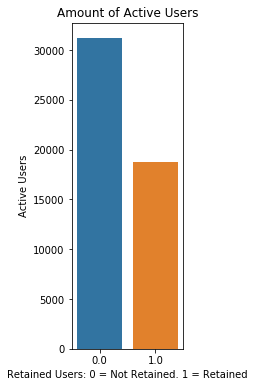

In [87]:
fig = plt.figure(figsize=(2, 6))


ax = sns.barplot(x='index', y='active_30', data=dummy)
plt.xlabel('Retained Users: 0 = Not Retained. 1 = Retained')
plt.ylabel('Active Users')
plt.title('Amount of Active Users')

plt.show()

## Building a Model

In [88]:
rid.head(3)

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  \
0      3.67                   5.0                   4.7        1.1   
1      8.26                   5.0                   5.0        1.0   
2      0.77                   5.0                   4.3        1.0   

             city last_trip_date    phone signup_date  surge_pct  \
0  King's Landing     2014-06-17   iPhone  2014-01-25       15.4   
1         Astapor     2014-05-05  Android  2014-01-29        0.0   
2         Astapor     2014-01-07   iPhone  2014-01-06        0.0   

   trips_in_first_30_days  ultimate_black_user  weekday_pct  active_30  
0                       4                 True         46.2        1.0  
1                       0                False         50.0        0.0  
2                       3                False        100.0        0.0

In [89]:
rid.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [90]:
rid.phone.unique()

array(['iPhone', 'Android', None], dtype=object)

In [91]:
rid['city'] = rid['city'].map({"King's Landing" :1, 'Astapor':2, 'Winterfell':3}) #Convert string variables into numerical
rid['phone'] = rid['phone'].map({'None':0, 'Android':1, 'iPhone':2})

In [92]:
rid.head(3)

avg_dist  avg_rating_by_driver  avg_rating_of_driver  avg_surge  city  \
0      3.67                   5.0                   4.7        1.1     1   
1      8.26                   5.0                   5.0        1.0     2   
2      0.77                   5.0                   4.3        1.0     2   

  last_trip_date  phone signup_date  surge_pct  trips_in_first_30_days  \
0     2014-06-17    2.0  2014-01-25       15.4                       4   
1     2014-05-05    1.0  2014-01-29        0.0                       0   
2     2014-01-07    2.0  2014-01-06        0.0                       3   

   ultimate_black_user  weekday_pct  active_30  
0                 True         46.2        1.0  
1                False         50.0        0.0  
2                False        100.0        0.0

In [107]:
X = rid.dropna() # For simplicity's sake lets drop the nan values. Could have filled with average or 0

In [94]:
y = X.active_30

In [108]:
X = X.drop(['active_30', 'signup_date', 'last_trip_date'], axis=1) #drop target variable, and datetime columns

In [109]:
X['ultimate_black_user'] = X.ultimate_black_user.astype('int64')

In [112]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif.round(1)

#Using VIF to eliminate multicolinearity in the features for the model

VIF Factor                features
0         2.2                avg_dist
1        80.6    avg_rating_by_driver
2        48.9    avg_rating_of_driver
3        63.5               avg_surge
4         8.9                    city
5        14.4                   phone
6         3.0               surge_pct
7         1.5  trips_in_first_30_days
8         1.7     ultimate_black_user
9         4.2             weekday_pct

In [113]:
X = X.drop(['avg_rating_by_driver', 'avg_surge', 'phone'], axis=1)

In [114]:
vif2 = pd.DataFrame()
vif2["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif2["features"] = X.columns

vif2.round(1)

VIF Factor                features
0         2.2                avg_dist
1        11.8    avg_rating_of_driver
2         7.6                    city
3         1.3               surge_pct
4         1.5  trips_in_first_30_days
5         1.7     ultimate_black_user
6         4.1             weekday_pct

In [115]:
X = X.drop(['avg_rating_of_driver', 'city'], axis =1) # VIF values above 5 not considered useful

In [116]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 5 columns):
avg_dist                  41445 non-null float64
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
ultimate_black_user       41445 non-null int64
weekday_pct               41445 non-null float64
dtypes: float64(3), int64(2)
memory usage: 1.9 MB


In [117]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [120]:
y_train.value_counts() #Balanced Target variables

0.0    17117
1.0    11894
Name: active_30, dtype: int64

In [121]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees

In [130]:
def run_RF_accuracy(X_train, y_train, X_test, y_test):
  rf = RandomForestClassifier(n_estimators = 1000, random_state = 42) #Instantiate the RandomForest Classifier
  rf.fit(X_train, y_train) #Fit
  y_pred = rf.predict(X_test) #Predict
  print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))
  cm = confusion_matrix(y_test, y_pred)
  print('\nConfusion matrix: \n',cm)

  print('\nClassification report: \n',classification_report(y_test, y_pred))

  rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

  print('Feature Importance:', rf.feature_importances_)

  plt.figure()
  plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC', dpi=400)
  plt.show()
    
  return rf

Accuracy of Random Forest classifier on test set: 0.69

Confusion matrix: 
 [[5336 1957]
 [1868 3273]]

Classification report: 
               precision    recall  f1-score   support

         0.0       0.74      0.73      0.74      7293
         1.0       0.63      0.64      0.63      5141

   micro avg       0.69      0.69      0.69     12434
   macro avg       0.68      0.68      0.68     12434
weighted avg       0.69      0.69      0.69     12434

Feature Importance: [0.48960517 0.15152795 0.09160431 0.03990355 0.22735902]


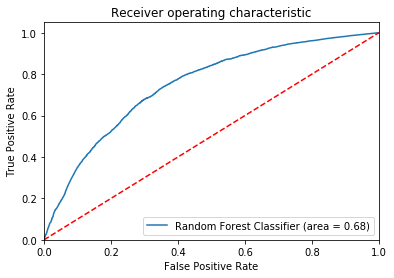

In [131]:
rf = run_RF_accuracy(X_train, y_train, X_test, y_test)

In [132]:
X_test.columns

Index(['avg_dist', 'surge_pct', 'trips_in_first_30_days',
       'ultimate_black_user', 'weekday_pct'],
      dtype='object')

## Model Accuracy

With an auc score of 68%, our model can fairly accurately predict if a rider will be retained in 6 month's of being signed up.
The following are the features that were used to predict retention, and the prediction strength:
- Average Distance : .49
- Weekday Percentage : .23
- Surge Percentage : .15
- Trips In First 30 Days: .09
- Ultimate Black Use : .04

Methods we can do to improve on this score are filling in the NaN values with averages. Optimizing the model hyperparamters with GridSearchCV or RandomSearchCV. Trying different machine learning models such as boosting or ensemble method. As a baseline model this ran fairly well though.

## Model Use

By knowing which users are not likely candidates to be retained users, further analysis or customer outreach on this group can be conducted to learn more about their needs and experiences. This information can help to convert these potential customers into potentially loyal ones through incentives or more aggressive marketing. Likely these people are still going to and from these destinations but are finding other means. 